Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Models

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Data

In [3]:
heart_df = pd.read_csv('../Datasets/heart.csv')

In [4]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
X = heart_df.drop(columns='target',axis=1)
Y = heart_df.target

In [6]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [7]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Train test split

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)

Comparing Performances

In [9]:
models = [LogisticRegression(),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier()]

In [10]:
def compare_models():
    for model in models:
        model.fit(X_train,Y_train)
        predict_test = model.predict(X_test)
        accurate = accuracy_score(Y_test,predict_test)

        print('Model accuracy: ',model,'-',accurate)


In [11]:
compare_models()

C:\Users\Jash\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy:  LogisticRegression() - 0.8032786885245902
Model accuracy:  SVC(kernel='linear') - 0.7704918032786885
Model accuracy:  KNeighborsClassifier() - 0.6557377049180327
Model accuracy:  RandomForestClassifier() - 0.7704918032786885


Cross Validation

Logistic Regression

In [12]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000),X,Y,cv=5)

C:\Users\Jash\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
print(cv_score_lr)
print(np.mean(cv_score_lr))

[0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
0.8282513661202187


SVC

In [14]:
cv_score_sc = cross_val_score(SVC(kernel='linear'),X,Y,cv=5)

In [15]:
print(cv_score_sc)
print(np.mean(cv_score_sc))

[0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
0.8283060109289618


RandomForestClassifier

In [16]:
cv_score_rf = cross_val_score(RandomForestClassifier(),X,Y,cv=5)

In [17]:
print(cv_score_rf)
print(np.mean(cv_score_rf))

[0.83606557 0.90163934 0.80327869 0.81666667 0.76666667]
0.8248633879781421


K Neighbours

In [18]:
cv_score_kc = cross_val_score(KNeighborsClassifier(),X,Y,cv=5)

In [19]:
print(cv_score_kc)
print(np.mean(cv_score_kc))

[0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
0.643879781420765


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='thal', ylabel='target'>

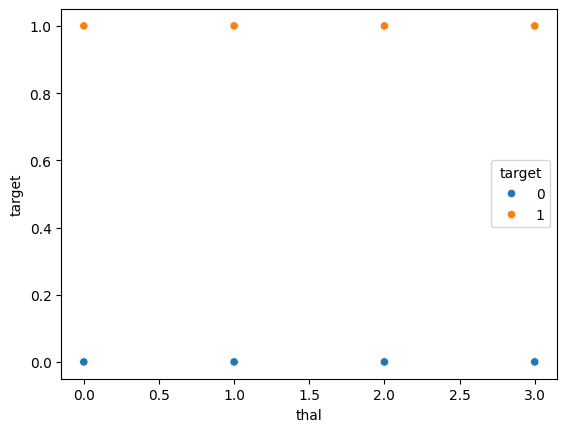

In [38]:
sns.scatterplot(x=X.iloc[:,12],y=Y,hue=Y)